In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import time
from datetime import datetime


## First introduction to COVID-19 Global Forecasting Competition on Kaggle

In [2]:
train = pd.read_csv('../data/raw/train.csv')
train.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0


In [3]:
train.describe()

,Id,Lat,Long,ConfirmedCases,Fatalities
count,17324.000000,17324.000000,17324.000000,17324.000000,17324.000000
mean,13190.500000,26.287693,4.766191,293.191180,10.421208
std,7624.680783,22.935113,79.923334,3382.665468,155.612328
min,1.000000,-41.454500,-157.498300,0.000000,0.000000
25%,6595.750000,13.145425,-71.516375,0.000000,0.000000
50%,13190.500000,32.985550,9.775000,0.000000,0.000000
75%,19785.250000,42.501575,64.688975,8.000000,0.000000
max,26380.000000,71.706900,174.886000,67800.000000,5476.000000


In [4]:
len(train)

17324

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17324 entries, 0 to 17323
Data columns (total 8 columns):
Id                17324 non-null int64
Province/State    7930 non-null object
Country/Region    17324 non-null object
Lat               17324 non-null float64
Long              17324 non-null float64
Date              17324 non-null object
ConfirmedCases    17324 non-null float64
Fatalities        17324 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
train.isnull().any()

Id                False
Province/State     True
Country/Region    False
Lat               False
Long              False
Date              False
ConfirmedCases    False
Fatalities        False
dtype: bool

In [7]:
train.isnull().sum()

Id                   0
Province/State    9394
Country/Region       0
Lat                  0
Long                 0
Date                 0
ConfirmedCases       0
Fatalities           0
dtype: int64

In [14]:
print('Number fo Country/Region: ',train['Country/Region'].nunique())
print('Dates go from day', max(train['Date']), 'to day', min(train['Date']),', a total of', train['Date'].nunique(),'days')
print('Countries with Province/State informed: ', train[train['Province/State'].isna()==False]['Country/Region'].unique())

Number fo Country/Region:  163
Dates go from day 2020-03-22 to day 2020-01-22 , a total of 61 days
Countries with Province/State informed:  ['Australia' 'Canada' 'China' 'Cruise Ship' 'Denmark' 'France'
 'Netherlands' 'US' 'United Kingdom']


## General Insights

In [27]:
confirmed_total_date = train.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date = train.groupby(['Date']).agg({'Fatalities':['sum']})
totals_date = confirmed_total_date.join(fatalities_total_date)

Text(0.5, 0, 'Date')

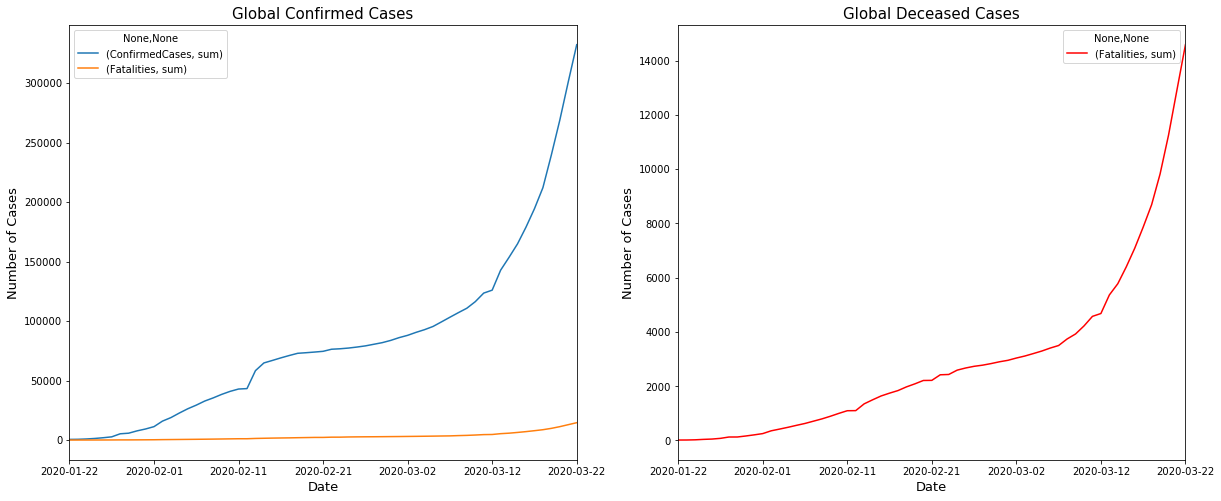

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8))
totals_date.plot(ax=ax1)
ax1.set_title('Global Confirmed Cases',size =15)
ax1.set_ylabel('Number of Cases', size=13)
ax1.set_xlabel('Date',size =13)


fatalities_total_date.plot(ax=ax2, color = 'red')
ax2.set_title("Global Deceased Cases", size=15)
ax2.set_ylabel("Number of Cases", size=13)
ax2.set_xlabel("Date", size=13)

## Global Tendency Minus China

Text(0.5, 0, 'Date')

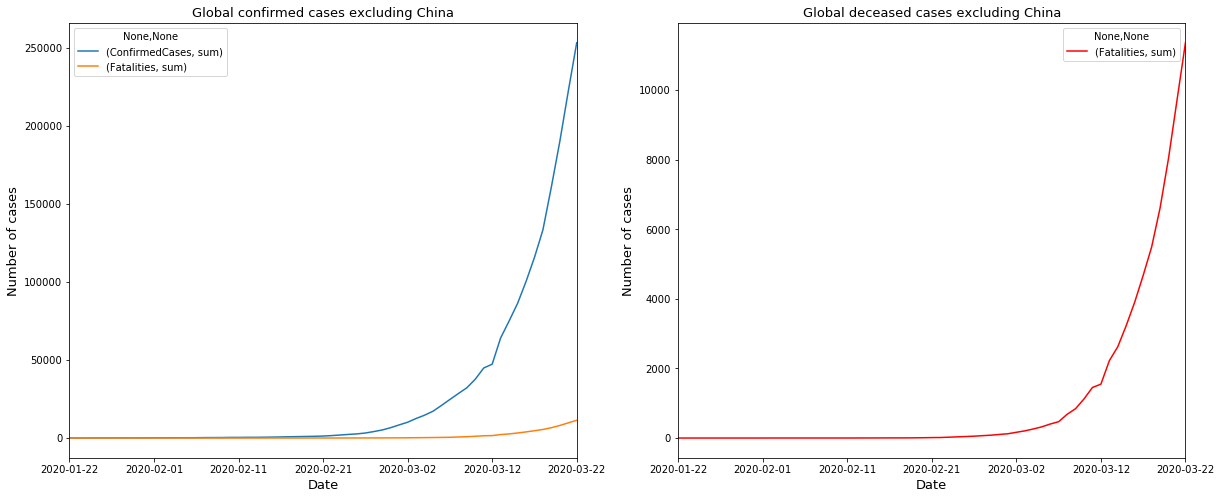

In [48]:
confirmed_total_date_noChina = train[train['Country/Region']!='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_noChina = train[train['Country/Region']!='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_noChina.plot(ax=ax2, color='red')
ax2.set_title("Global deceased cases excluding China", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## China

Text(0.5, 0, 'Date')

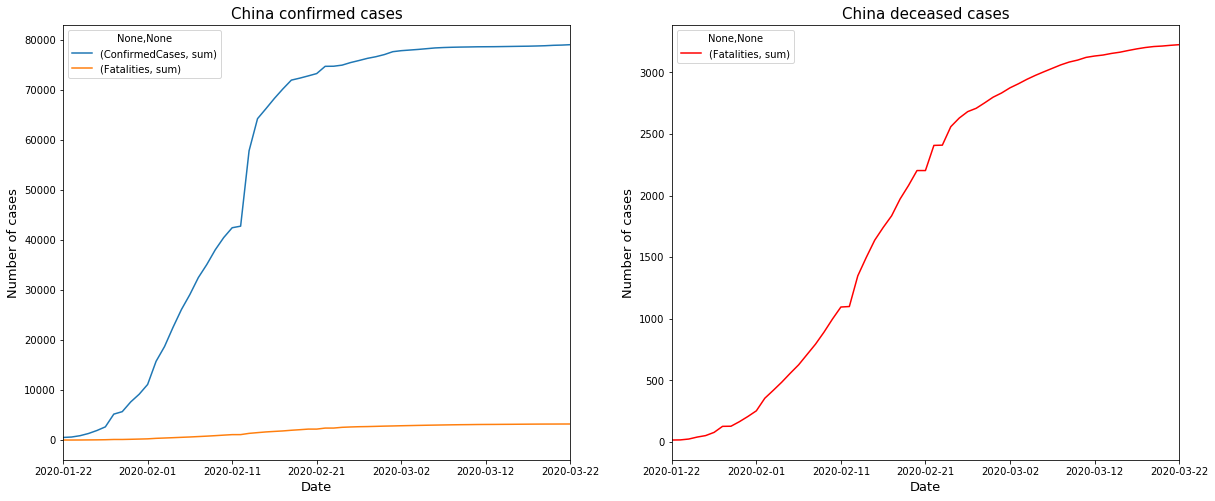

In [47]:
confirmed_total_date_China = train[train['Country/Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_China = train[train['Country/Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=15)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_China.plot(ax=ax2, color='red')
ax2.set_title("China deceased cases", size=15)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

## Italy, Spain, UK and Singapore

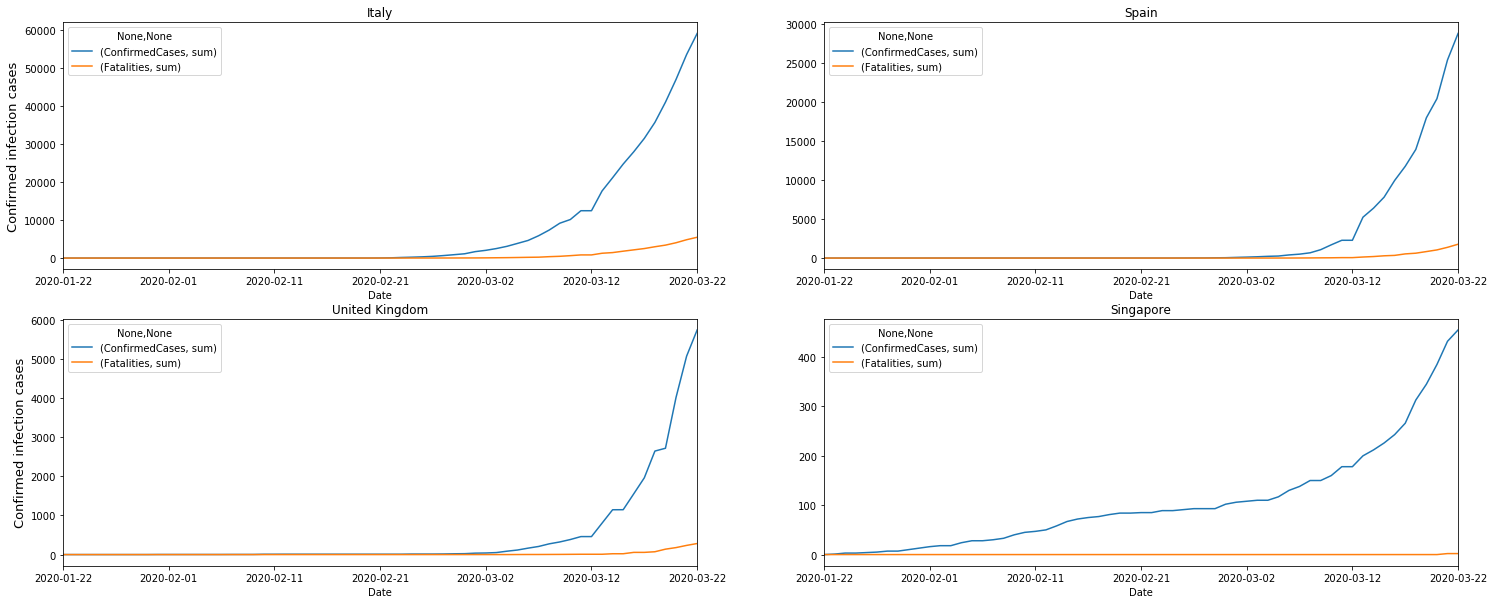

In [57]:
#confirmed_country_Italy = train[train['Country/Region']=='Italy'].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Italy = train[train['Country/Region']=='Italy'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Italy = train[train['Country/Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[train['Country/Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#confirmed_country_Spain = train[train['Country/Region']=='Spain'].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Spain = train[train['Country/Region']=='Spain'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Spain = train[train['Country/Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train[train['Country/Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

#confirmed_country_UK = train[train['Country/Region']=='United Kingdom'].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_UK = train[train['Country/Region']=='United Kingdom'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_UK = train[train['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train[train['Country/Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

#confirmed_country_Australia = train[train['Country/Region']=='Australia'].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Australia = train[train['Country/Region']=='Australia'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Australia = train[train['Country/Region']=='Australia'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Australia = train[train['Country/Region']=='Australia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)

#confirmed_country_Singapore = train[train['Country/Region']=='Singapore'].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Singapore = train[train['Country/Region']=='Singapore'].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Singapore = train[train['Country/Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Singapore = train[train['Country/Region']=='Singapore'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

plt.figure(figsize=(25,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')

(0, 0.005)

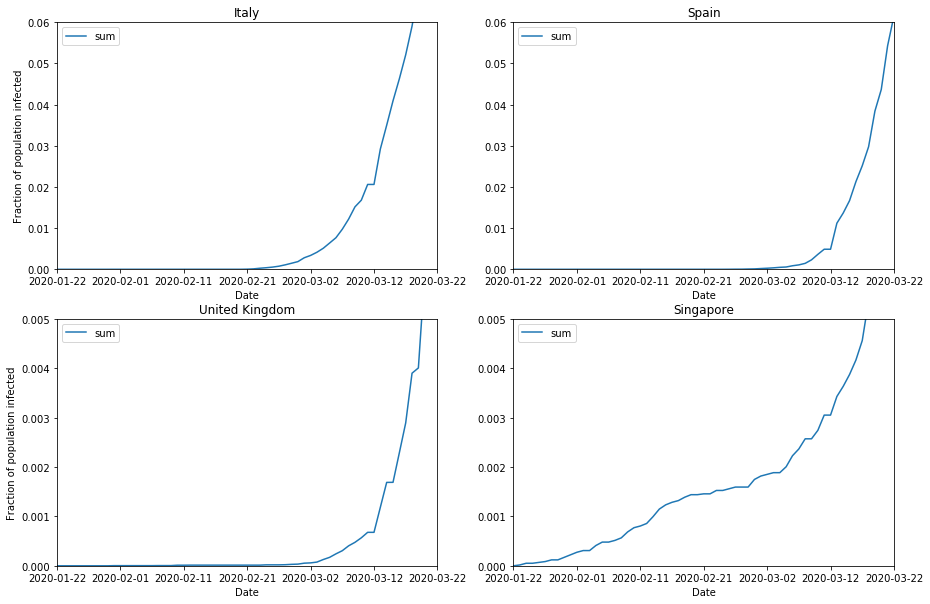

In [58]:
pop_italy = 60486683.
pop_spain = 46749696.
pop_UK = 67784927.
pop_singapore = 5837230.

total_date_Italy.ConfirmedCases = total_date_Italy.ConfirmedCases/pop_italy*100.
total_date_Italy.Fatalities = total_date_Italy.ConfirmedCases/pop_italy*100.
total_date_Spain.ConfirmedCases = total_date_Spain.ConfirmedCases/pop_spain*100.
total_date_Spain.Fatalities = total_date_Spain.ConfirmedCases/pop_spain*100.
total_date_UK.ConfirmedCases = total_date_UK.ConfirmedCases/pop_UK*100.
total_date_UK.Fatalities = total_date_UK.ConfirmedCases/pop_UK*100.
total_date_Singapore.ConfirmedCases = total_date_Singapore.ConfirmedCases/pop_singapore*100.
total_date_Singapore.Fatalities = total_date_Singapore.ConfirmedCases/pop_singapore*100.

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.ConfirmedCases.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.06)

plt.subplot(2, 2, 2)
total_date_Spain.ConfirmedCases.plot(ax=plt.gca(), title='Spain')
plt.ylim(0, 0.06)

plt.subplot(2, 2, 3)
total_date_UK.ConfirmedCases.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.005)

plt.subplot(2, 2, 4)
total_date_Singapore.ConfirmedCases.plot(ax=plt.gca(), title='Singapore')
plt.ylim(0, 0.005)

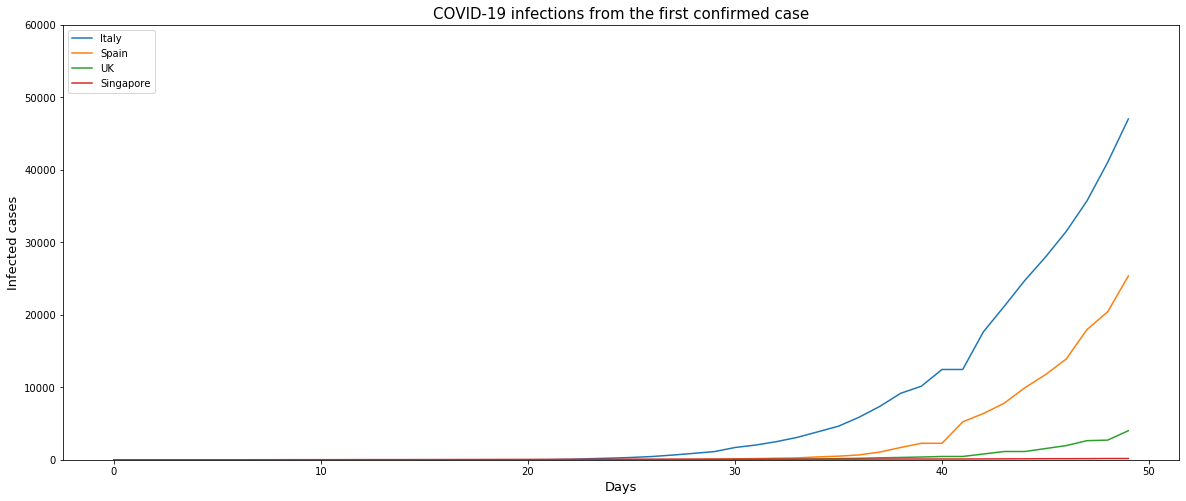

In [56]:
#confirmed_country_Italy = train[(train['Country/Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Italy = train[(train['Country/Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Italy = train[(train['Country/Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[(train['Country/Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

#confirmed_country_Spain = train[(train['Country/Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Spain = train[(train['Country/Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Spain = train[(train['Country/Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train[(train['Country/Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

#confirmed_country_UK = train[(train['Country/Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_UK = train[(train['Country/Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_UK = train[(train['Country/Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train[(train['Country/Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

#confirmed_country_Australia = train[(train['Country/Region']=='Australia') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Australia = train[(train['Country/Region']=='Australia') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Australia = train[(train['Country/Region']=='Australia') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Australia = train[(train['Country/Region']=='Australia') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Australia = confirmed_total_date_Australia.join(fatalities_total_date_Australia)

#confirmed_country_Singapore = train[(train['Country/Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_Singapore = train[(train['Country/Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Country/Region', 'Province/State']).agg({'Fatalities':['sum']})
confirmed_total_date_Singapore = train[(train['Country/Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Singapore = train[(train['Country/Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

italy = [i for i in total_date_Italy.ConfirmedCases['sum'].values]
italy_30 = italy[0:50] 
spain = [i for i in total_date_Spain.ConfirmedCases['sum'].values]
spain_30 = spain[0:50] 
UK = [i for i in total_date_UK.ConfirmedCases['sum'].values]
UK_30 = UK[0:50] 
singapore = [i for i in total_date_Singapore.ConfirmedCases['sum'].values]
singapore_30 = singapore[0:50] 


# Plots
plt.figure(figsize=(20,8))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.plot(singapore_30)
plt.legend(["Italy", "Spain", "UK", "Singapore"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 60000)
plt.show()